In [ ]:
!pip install nltk
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 62.1 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=23b154f334e01152659d4802b803d48bdab6c29a9b737a333dca1f1583ec9da9
  Stored in directory: /root/.cache/pip/wheels/71/67/06/162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence-transformers


In [ ]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import numpy as np
from nltk.corpus import wordnet
import matplotlib.pyplot as plt
from gensim import corpora, models
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline


In [ ]:

# Load the dataset
df = pd.read_csv("/content/sample_data/depression_pre_features_tfidf_256_clean.csv", error_bad_lines=False)

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

<ipython-input-35-b15524320456>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("/content/sample_data/depression_pre_features_tfidf_256_clean.csv", error_bad_lines=False)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Preprocess the text
def preprocess_text(text):
    # Remove punctuation and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
   
    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Remove stopwords
    
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize the text

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Convert tokens back to text
    processed_text = ' '.join(tokens)
    return processed_text

df['processed_text'] = df['post'].apply(preprocess_text)



In [ ]:
# Generate embeddings using S-BERT
model = SentenceTransformer('bert-base-nli-mean-tokens')
embeddings = model.encode(df['processed_text'])

In [ ]:
# Clustering using K-means
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(embeddings)
labels = kmeans.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# #Apply dimensionality reduction using LSA
# lsa = TruncatedSVD(n_components=10, random_state=42)
# lsa_features = lsa.fit_transform(embeddings)

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5, min_df=2)
X = vectorizer.fit_transform(df['post'])
svd = TruncatedSVD(n_components=num_clusters)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
X_lsa = lsa.fit_transform(X)

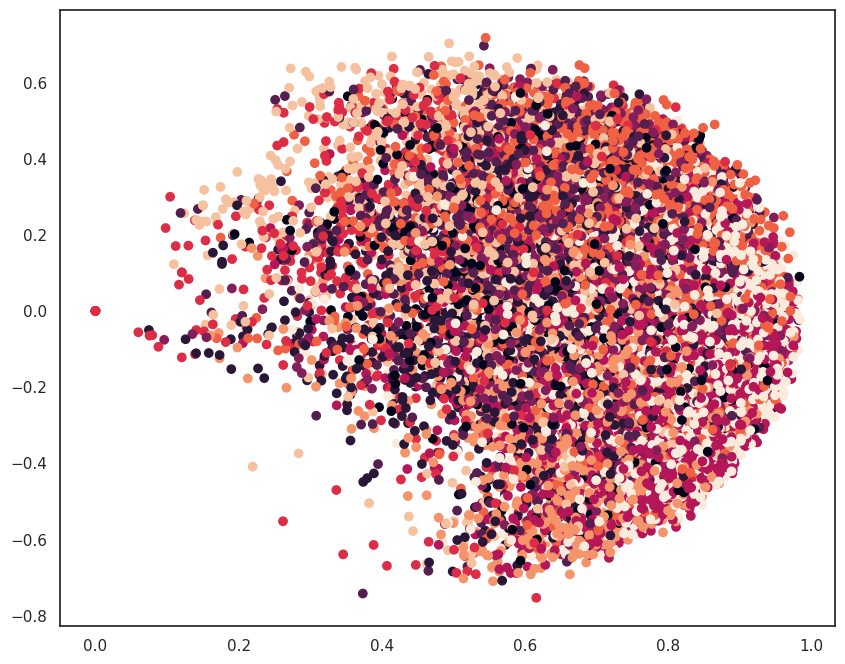

In [ ]:
# Visualize the clusters using a scatter plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', rc={'figure.figsize':(10,8)})
plt.scatter(X_lsa[:, 0], X_lsa[:, 1], c=labels)
plt.show()

In [ ]:
# Calculate correlation matrix
corr_matrix = np.corrcoef(X_lsa.T)
# Print the correlation matrix
print(corr_matrix)

[[ 1.         -0.19613283  0.06226241  0.04691343 -0.00598356 -0.14881961
  -0.3168473  -0.13472105 -0.07180488 -0.08765631]
 [-0.19613283  1.         -0.01578232  0.06787999 -0.04890089 -0.07675702
  -0.04508812  0.03726579  0.03665997 -0.04405968]
 [ 0.06226241 -0.01578232  1.         -0.03420044 -0.00481873  0.11624123
   0.02861256  0.04807985 -0.08073941  0.02974625]
 [ 0.04691343  0.06787999 -0.03420044  1.         -0.02952443 -0.05883642
   0.02551494  0.07200522  0.02654293 -0.00933458]
 [-0.00598356 -0.04890089 -0.00481873 -0.02952443  1.          0.02956746
   0.12833871  0.0332677   0.06414308 -0.01548236]
 [-0.14881961 -0.07675702  0.11624123 -0.05883642  0.02956746  1.
   0.04444772  0.15931778  0.08136418 -0.13387931]
 [-0.3168473  -0.04508812  0.02861256  0.02551494  0.12833871  0.04444772
   1.         -0.21118917 -0.15155352 -0.05601909]
 [-0.13472105  0.03726579  0.04807985  0.07200522  0.0332677   0.15931778
  -0.21118917  1.         -0.12663811  0.03352695]
 [-0.071

In [ ]:
# Convert LSA features to a dataframe
df_lsa = pd.DataFrame(X_lsa, columns=['lsa_feature_' + str(i+1) for i in range(X_lsa.shape[1])])

# Merge LSA features with original dataframe
df = pd.concat([df, df_lsa], axis=1)

# Extract topic labels using LDA
dictionary = corpora.Dictionary(df['processed_text'].apply(nltk.word_tokenize))
corpus = [dictionary.doc2bow(text) for text in df['processed_text'].apply(nltk.word_tokenize)]
lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=10)
df['topic_labels'] = [lda_model.get_document_topics(corpus[i])[0][0] for i in range(len(corpus))]

# Calculate correlation between topics using Pearson correlation coefficient
topic_correlations = []
for i in range(10):
    topic_embeddings = embeddings[df['topic_labels'] == i]
    topic_lsa_features = X_lsa[df['topic_labels'] == i]
    if len(topic_embeddings) > 1:
        corr_matrix = np.corrcoef(topic_lsa_features.T)
        topic_correlations.append((i, np.mean(corr_matrix)))

# Print the average correlation for each topic
for correlation in topic_correlations:
    print('Topic', correlation[0], 'correlation:', correlation[1])

Topic 0 correlation: 0.0808978903432679
Topic 1 correlation: 0.052247982888551085
Topic 2 correlation: 0.06896290979290164
Topic 3 correlation: 0.07807263771314232
Topic 4 correlation: 0.06942583711028222
Topic 5 correlation: 0.07089659069721511
Topic 6 correlation: 0.07735227716351291
Topic 7 correlation: 0.0417570839665148
Topic 8 correlation: 0.0497841441374674
Topic 9 correlation: 0.04438426587210035


In [ ]:
#List of topics 
top_words = []
for i in range(10):
    print(f'Topic {i}:')
    top_words = lda_model.show_topic(i, topn=10)
    for word, prob in top_words:
        print(f'{word}: {prob:.3f}')
    print('\n')


Topic 0:
get: 0.016
work: 0.014
job: 0.013
year: 0.011
life: 0.011
time: 0.010
day: 0.009
go: 0.009
even: 0.008
like: 0.008


Topic 1:
amp: 0.071
x200b: 0.051
depression: 0.028
doctor: 0.025
medication: 0.023
antidepressant: 0.019
med: 0.019
taking: 0.018
take: 0.016
effect: 0.016


Topic 2:
wa: 0.060
year: 0.021
time: 0.015
friend: 0.015
got: 0.011
school: 0.010
back: 0.009
month: 0.009
started: 0.009
day: 0.009


Topic 3:
weed: 0.074
smoking: 0.051
smoke: 0.044
blah: 0.025
lexapro: 0.024
sober: 0.019
cigarette: 0.016
crisis: 0.014
smoked: 0.011
existential: 0.009


Topic 4:
want: 0.050
hate: 0.028
life: 0.027
die: 0.020
fucking: 0.018
like: 0.014
know: 0.013
shit: 0.012
even: 0.011
na: 0.011


Topic 5:
one: 0.014
people: 0.014
life: 0.013
world: 0.012
love: 0.012
thing: 0.008
would: 0.008
see: 0.008
could: 0.007
u: 0.007


Topic 6:
feel: 0.072
like: 0.048
feeling: 0.019
day: 0.019
know: 0.016
time: 0.014
get: 0.013
even: 0.012
thing: 0.011
happy: 0.011


Topic 7:
wa: 0.051
mom: 0.021

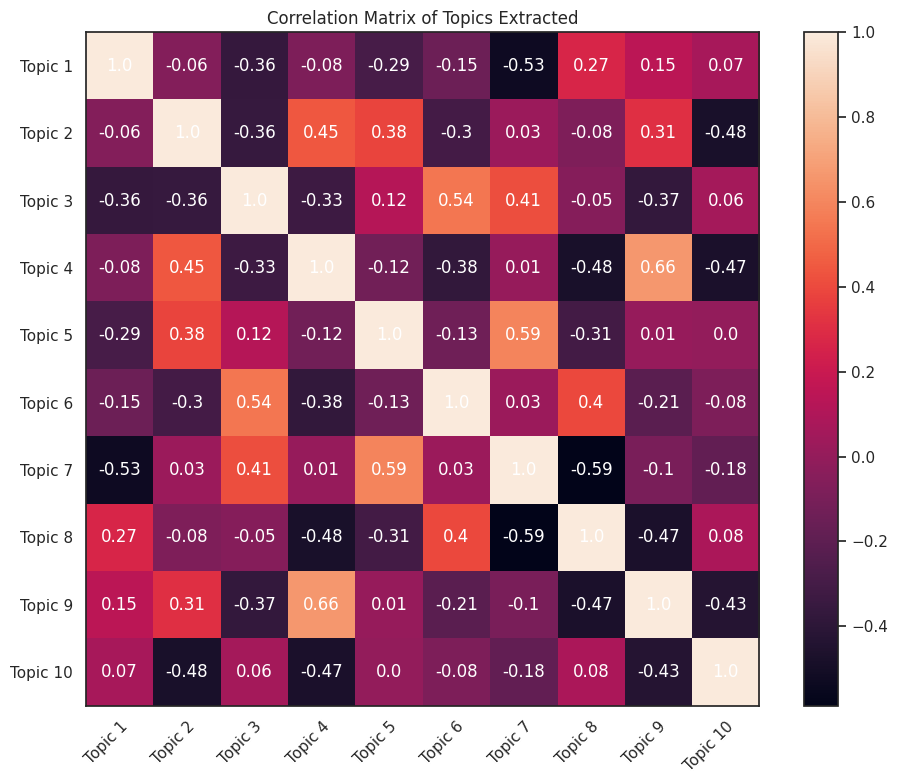

In [ ]:
# Visualize correlation matrix
topic_names = ['Topic ' + str(i+1) for i in range(lda_model.num_topics)]
fig, ax = plt.subplots()
im = ax.imshow(corr_matrix)

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set tick labels and rotation
ax.set_xticks(np.arange(len(topic_names)))
ax.set_yticks(np.arange(len(topic_names)))
ax.set_xticklabels(topic_names)
ax.set_yticklabels(topic_names)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data and create annotations
for i in range(len(topic_names)):
    for j in range(len(topic_names)):
        text = ax.text(j, i, round(corr_matrix[i, j], 2),
                       ha="center", va="center", color="w")

ax.set_title("Correlation Matrix of Topics Extracted")
fig.tight_layout()
plt.show()

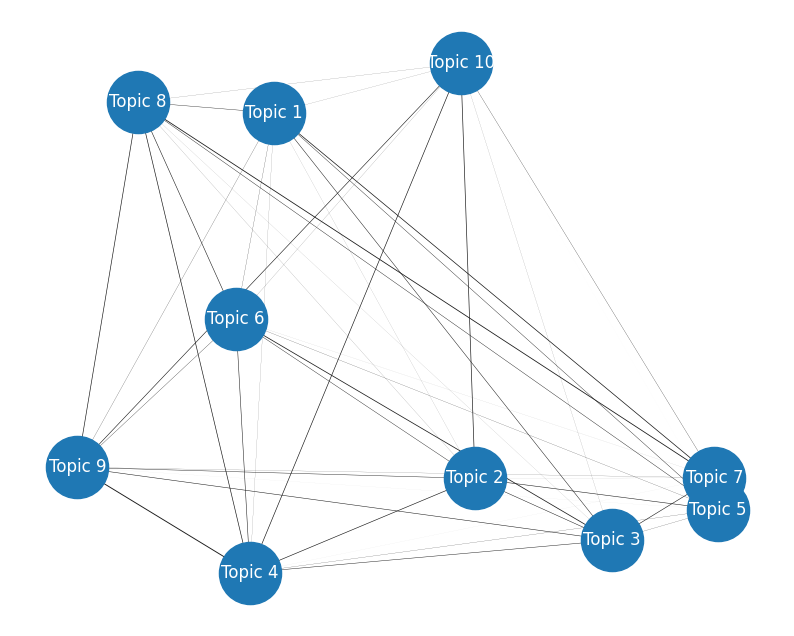

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph object
G = nx.Graph()

# Add nodes for each topic
for i, topic in enumerate(topic_names):
    G.add_node(topic)

# Add edges between topics with correlation above a threshold
for i in range(len(topic_names)):
    for j in range(i+1, len(topic_names)):
        # if corr_matrix[i][j] > threshold:
          G.add_edge(topic_names[i], topic_names[j], weight=corr_matrix[i][j])

# Draw the graph
pos = nx.spring_layout(G, k=0.5)
edges = G.edges()
weights = [G[u][v]['weight'] for u,v in edges]
nx.draw_networkx_nodes(G, pos, node_size=2000)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=weights)
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif', font_color='white')
plt.axis('off')
plt.show()
